In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import seaborn as sns

In [61]:
# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")

In [62]:
ads_list = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_광고목록.csv')
print(f"데이터 수 : {ads_list.shape}")
ads_list.head()

데이터 수 : (445260, 26)


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
0,160,tr71opm6C1,6,10,13604,1,1,리니지레드나이츠,"리니지레드나이츠,com.ncsoft.redknights,ecaab3f9d2616f6...",https://lh3.googleusercontent.com/oDGXxngO9oOP...,...,0,100,2,170,150,982800,NONE,Y,2017-04-06 13:19:53,N
1,284,xlNpfkgtLX,6,10,13605,1,1,강철의함대:Ocean Overlord,"강철의함대:Ocean Overlord,com.gamepub.lw.g,a370ab70...",http://nextapps-nas.aws.appang.kr/icon/2016122...,...,0,100,2,180,160,987200,NONE,Y,2017-01-10 10:37:22,N
2,292,7Hj8V5QKiy,6,10,13606,1,1,스노우 SNOW,"스노우 SNOW,com.campmobile.snow,5b892d7e0cff73621...",http://nextapps-nas.aws.appang.kr/icon/2016092...,...,0,100,2,160,160,987300,NONE,Y,2017-01-02 12:51:34,N
3,304,1RfxHJcuEe,6,10,13607,2,1,서머너즈 워: 천공의 아레나,"서머너즈 워: 천공의 아레나,com.com2us.smon.normal.freeful...",http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,...,0,100,2,230,210,931000,NONE,Y,2017-03-30 17:05:23,N
4,306,l3GyilYEVk,6,10,23543,1,1,하이마트,"하이마트,com.himart.main,8230c6a95581533fad10b0e3b...",http://nextapps-nas.aws.appang.kr/icon/2016032...,...,0,100,2,170,140,1155100,NONE,Y,2017-06-12 15:24:46,N


In [158]:
ads_list['ads_rejoin_type'].value_counts()

ads_rejoin_type
NONE                     366451
ADS_CODE_DAILY_UPDATE     76934
REJOINABLE                 1875
Name: count, dtype: int64

In [159]:
ads_list[['ads_type', 'ads_category', 'ads_guide', 'ads_save_way', 'ads_day_cap', 'delyn']]

,ads_type,ads_category,ads_guide,ads_save_way,ads_day_cap,delyn
0,1,1,참여 완료시점까지 완료 후 리워드 지급까지는 최대 10분 가량 지연될 수 있습니다....,받기,N,N
1,1,1,참여 완료시점까지 완료 후 리워드 지급까지는 최대 10분 가량 지연될 수 있습니다....,받기,N,N
2,1,1,참여 완료시점까지 완료 후 리워드 지급까지는 최대 10분 가량 지연될 수 있습니다....,받기,N,N
3,2,1,참여 완료시점까지 완료 후 리워드 지급까지는 최대 10분 가량 지연될 수 있습니다....,최초 오픈,N,N
4,1,1,참여 완료시점까지 완료 후 리워드 지급까지는 최대 10분 가량 지연될 수 있습니다....,받기,Y,N
...,...,...,...,...,...,...
445255,3,4,참여 완료시점까지 완료 후 리워드 지급까지는 최대 1시간 가량 지연 될 수 있습니다...,정답입력,N,N
445256,3,4,참여 완료시점까지 완료 후 리워드 지급까지는 최대 1시간 가량 지연 될 수 있습니다...,퀴즈 맞추기,N,N
445257,3,4,참여 완료시점까지 완료 후 리워드 지급까지는 최대 1시간 가량 지연 될 수 있습니다...,네이버스마트스토어 퀴즈,N,N
445258,3,8,"참여 완료시점까지 완료 후 리워드 지급까지는 평일 기준(주말,공휴일 제외) 최대 2...",참여,N,N


In [163]:
# delyn 컬럼이 'Y'인 행만 필터링
filtered = ads_list[ads_list["delyn"] == "Y"]
filtered


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
7,1142,zQ76Efhdj3,9,0,0,3,0,데저트스톰_사전예약(desert_storm_cpa),"데저트스톰_사전예약(desert_storm_cpa),,3281",http://img.shallweadcorp.com/AdImage/Campaign_...,...,0,100,2,650,590,22100,NONE,Y,2017-01-05 11:31:16,Y
14,1180,ngo2OKJYga,0,32,0,1,1,지하철종결자,"지하철종결자,kakao44c6187801b61d99667c6c68852ed5a3://,",https://lh5.ggpht.com/1Wpnz4mt5wYxilWF2njQtc2w...,...,0,100,1,1,1,987900,NONE,Y,2017-01-11 16:47:10,Y
26,1220,YAxjTA2iP5,1,64,0,1,1,메탈크래쉬,"메탈크래쉬,com.chaplingame.metal.kor,",http://imgur.com/is9g8KQ,...,0,100,3,200,150,988900,NONE,Y,2017-01-19 18:34:22,Y
456,2039,28SaZM6shd,6,10,6652,3,0,핀크 가입 이벤트,"핀크 가입 이벤트,com.finnq.f1,adc608c9f297e0a4fd202a7...",https://lh3.googleusercontent.com/KgthZ-ko-J1W...,...,0,100,3,700,595,670700,NONE,Y,2017-12-08 15:06:55,Y
475,2058,yGoECaidUz,1,84,0,1,1,변호사님닷컴,"변호사님닷컴,,",https://i.imgur.com/nQs6SP5.png,...,0,100,1,190,150,1005400,NONE,Y,2017-12-15 13:21:11,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439413,441072,VPtZb3BS8m,57,84,0,3,8,[클릭메이트-단골맺기] 홍선수,"[클릭메이트-단골맺기] 홍선수,af85d514-917f-40d7-bc0d-25ed3...",https://s3.ap-northeast-2.amazonaws.com/com.ga...,...,0,100,7,200,150,2757200,NONE,Y,2025-08-06 14:16:36,Y
440342,442001,E5RRhoL1eT,8,50,0,1,2,초월자 키우기,"초월자 키우기,com.playgames.transcender,75246003",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2758500,NONE,Y,2025-08-08 16:54:36,Y
442692,444351,dY7jZ77yka,15,1672,1218845,1,2,[원스토어] 조조의 꿈,"[원스토어] 조조의 꿈,com.teamquest.Threekingdoms_GP",https://i.imgur.com/TYzuYah.jpeg,...,0,100,3,180,120,2760700,NONE,Y,2025-08-14 15:33:46,Y
442693,444352,MnWcfxDVbK,15,1672,1218853,2,2,조조의 꿈,조조의 꿈,https://i.imgur.com/TYzuYah.jpeg,...,0,100,1,280,180,2760800,NONE,Y,2025-08-14 15:33:53,Y


In [170]:
ads_info[ads_info['ads_idx'] == 1180]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted,click_hour,click_minute


In [63]:
ads_list.isnull().sum()

ads_idx                  0
ads_code                 0
aff_idx                  0
adv_idx                  0
sch_idx                  0
ads_type                 0
ads_category             0
ads_name                 0
ads_search               2
ads_icon_img             5
ads_summary           7061
ads_guide              303
ads_save_way           514
ads_day_cap              0
ads_sdate                0
ads_edate                0
ads_age_min              0
ads_age_max              0
ads_os_type              0
ads_contract_price       0
ads_reward_price         0
ads_order                0
ads_rejoin_type          0
ads_require_adid         0
regdate                  0
delyn                    0
dtype: int64

In [64]:
ads_rwd = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_광고적립.csv')
print(f"데이터 수 : {ads_rwd.shape}")
ads_rwd.head()

데이터 수 : (1475031, 14)


,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,adv_cost,earn_cost,click_date,regdate,ctit,cost_diff
0,238304818,413490,CFZ6lzEmeD,22,27496512,32947806,09b6a808-4f76-4584-87c5-626f21f472a0,b0e22dba943810794d25c993dff425c4e16d0744,190,120,2025-07-26 00:00:31,2025-07-26 00:05:02,271,70
1,238304829,413490,CFZ6lzEmeD,22,27496512,47387244,ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e,0679ff4c6a14beba296e44d7ffdd88129f42ffbf,190,120,2025-07-26 00:00:32,2025-07-26 00:08:17,465,70
2,238304816,413490,CFZ6lzEmeD,22,27496512,32425124,64c675d0-8edd-4478-9906-a806651fdf92,68eb28d636724061da21e490a1afff6a39cd78f7,190,120,2025-07-26 00:00:42,2025-07-26 00:04:43,241,70
3,238304817,413490,CFZ6lzEmeD,22,27496513,34006545,a08ebb04-e70a-4492-89d4-17fa96bf8c75,37da42f12b6f732d8c8bf1a609c01e569b7f8a09,190,120,2025-07-26 00:00:54,2025-07-26 00:04:45,231,70
4,238304802,133653,rl8ud4uNQC,801,1,56867331,dbe54f40-41b5-4423-ae2f-048fd6ecf5af,624b1bbc57c9ea81005c74e1956d48e76d974816,260,195,2025-07-26 00:01:07,2025-07-26 00:02:04,57,65


In [65]:
ads_rwd.isnull().sum()

rwd_idx              0
ads_idx              0
ads_code             0
mda_idx              0
pub_sub_rel_id       0
dvc_idx              0
advid             7171
click_key            0
adv_cost             0
earn_cost            0
click_date           0
regdate              0
ctit                 0
cost_diff            0
dtype: int64

In [87]:
ads_info = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_광고참여정보.csv')
print(f"데이터 수 : {ads_info.shape}")
ads_info.head()

데이터 수 : (16854865, 13)


,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211


In [67]:
ads_info.isnull().sum()

click_key               0
ads_idx                 0
dvc_idx                 0
mda_idx                 0
pub_sub_rel_id          0
contract_price          0
media_price             0
click_day               0
click_time              0
click_date              0
exp_day                 0
network           2501362
user_ip                 9
dtype: int64

In [68]:
ads_time = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_시간별적립보고서(최종).csv')
print(f"데이터 수 : {ads_time.shape}")
ads_time.head()

데이터 수 : (279916, 10)


,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type
0,2025-07-27,0,11059,398,5,0,0,0,6,주말
1,2025-07-27,0,13209,583,3,0,0,0,6,주말
2,2025-07-27,0,13928,303,3,3,510,360,6,주말
3,2025-07-27,0,13928,324,3,3,510,360,6,주말
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말


In [88]:
# 기준 키
keys = ["click_key"]

# 광고적립에서 전환된 키만 추출 (중복 제거)
converted_keys = ads_rwd[keys].drop_duplicates()

In [89]:
ads_info = ads_info.merge(
    converted_keys.assign(converted=1),
    on=keys,
    how="left"
)

ads_info["converted"] = ads_info["converted"].fillna(0).astype(int)

In [90]:
ads_info["converted"].value_counts()

converted
0    15379915
1     1474950
Name: count, dtype: int64

In [91]:
cvr = ads_info["converted"].mean() * 100
print(f"전체 전환율: {cvr:.2f}%")

전체 전환율: 8.75%


In [150]:
# 전체 전환수 (converted=1인 행의 합)
total_conversions = ads_info["converted"].sum()

# 전체 클릭수 (참여 로그라면 = 행 개수)
total_clicks = len(ads_info)

# 클릭 수 기준 가중 평균 CVR
cvr_weighted = (total_conversions / total_clicks) * 100

print(f"전체 전환율 (클릭수 기준): {cvr_weighted:.2f}%")


전체 전환율 (클릭수 기준): 8.75%


In [92]:
# 전환 키만 추출
reward_keys = ads_rwd["click_key"].drop_duplicates()
part_keys   = ads_info["click_key"].drop_duplicates()

# 참여 테이블에 없는 전환 키만 추출 (차집합)
missing_keys = reward_keys[~reward_keys.isin(part_keys)]

# 개수 출력
print("참여 테이블에 없는 전환 키 수:", missing_keys.nunique())


참여 테이블에 없는 전환 키 수: 81


In [78]:
missing_keys

1474950    d56bca037702d7c799c6d9fc06e14a3c035dd6ea
1474951    b2d5f7ca9225af1b3819de511c3f095a73420fd5
1474952    05f8b58670c2fd35a77a7fd424b64079ebfe6e2b
1474953    5ca9f38df521a00f571c244dbd0a8341bfe71108
1474954    bb18ad0ee8f07ba7d4c2a2a3f9dec3713008306d
                             ...                   
1475026    3dc358e1a2b6a3480ba45dc65f81a308bc6c5e70
1475027    d3a189157fc1c3b458b44e485a38ad544b89402d
1475028    c752e95c5a236c8799cbcf4dc516b7e09e1afda7
1475029    4dc015e177c38a9d2d0cf65d2b2e146e79352683
1475030    ffbad59341e1268406e2e45f18dac5b7ee21a4e1
Name: click_key, Length: 81, dtype: object

In [ ]:
ads_rwd[ads_rwd['click_key'] == 'ffbad59341e1268406e2e45f18dac5b7ee21a4e1']

,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,adv_cost,earn_cost,click_date,regdate,ctit,cost_diff
1475030,239780612,356956,1UNE1La9yv,270,1,61667811,729dcecc-2369-4ead-88f4-0e8544c5e63f,ffbad59341e1268406e2e45f18dac5b7ee21a4e1,5,3,2025-08-25 11:33:22,2025-08-25 11:33:36,14,2


In [ ]:
ads_info[(ads_info['dvc_idx'] == 62076634) & (ads_info['click_date'] == '2025-08-25 11:24:21')]


,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted


In [119]:
ads_info["click_date"] = pd.to_datetime(ads_info["click_date"])

In [123]:
ads_info["click_hour"] = ads_info["click_date"].dt.hour
ads_info["click_minute"] = ads_info["click_date"].dt.minute

In [142]:
ads_info[(ads_info['click_day'] == '2025-08-25') & (ads_info['click_hour'] > 11)]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted,click_hour,click_minute


In [143]:
ads_info[ads_info['click_day'] > '2025-08-25']

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted,click_hour,click_minute


In [139]:
ads_info[ads_info['click_hour'] > 11]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted,click_hour,click_minute
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,0,21,7
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,1,18,17
6,0000085cb8b672399492f8d268e1144f604ce1a6,369816,43664274,539,144350110,3600,2700,2025-08-14,18,2025-08-14 18:25:13,2025-09-13,0,43.203.115.240,0,18,25
7,00000a1e1110ded8315728177d80b91b94637fba,372307,60442283,539,144350110,15600,11700,2025-08-15,16,2025-08-15 16:49:57,2025-09-14,0,43.203.115.240,0,16,49
8,00000adaa9a9d925d056d3e0a172cbb53de38e1b,360192,59290214,539,144350110,6000,4500,2025-08-14,20,2025-08-14 20:05:06,2025-09-13,0,3.38.148.211,0,20,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854859,fffff9783993de42ab0d0c245120d62f5736a721,313780,61894534,539,144350110,6000,4500,2025-08-17,12,2025-08-17 12:44:39,2025-09-16,0,211.248.14.38,0,12,44
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,0,122.32.24.115,0,23,57
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,0,13.125.212.103,0,15,16
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,0,115.40.102.142,0,12,4


In [149]:
ads_info[ads_info['click_day'] == '2025-08-25']
ads_info.head()

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted,click_hour,click_minute
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,0,21,7
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76,1,2,18
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,1,18,17
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,0,3,35
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,0,8,1


In [146]:
ads_info[(ads_info['dvc_idx'] == 61667811) & (ads_info['mda_idx'] == 270)]
ads_info.head()

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted,click_hour,click_minute
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,0,21,7
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76,1,2,18
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,1,18,17
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,0,3,35
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,0,8,1


In [102]:
ads_info[ads_info['click_date'] == '2025-08-25 11:24:21']

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted


In [147]:
ads_info[ads_info['dvc_idx'] == 61667811]
ads_info.head()

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted,click_hour,click_minute
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,0,21,7
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76,1,2,18
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,1,18,17
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,0,3,35
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,0,8,1


In [148]:
ads_info.head()

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted,click_hour,click_minute
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,0,21,7
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76,1,2,18
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,1,18,17
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,0,3,35
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,0,8,1


In [145]:
dup_keys = ads_info["click_key"][ads_info["click_key"].duplicated()].unique()
print("중복된 click_key 개수:", len(dup_keys))

중복된 click_key 개수: 0


In [171]:
ads_info["click_date"] = pd.to_datetime(ads_info["click_date"])
ads_info = ads_info.sort_values(["dvc_idx", "click_date"])

ads_info["click_gap"] = ads_info.groupby("dvc_idx")["click_date"].diff().dt.total_seconds()


In [ ]:
ads_info["click_gap"]

4554412      NaN
10789534    62.0
5937766     73.0
12119408    14.0
4511645     51.0
            ... 
13323051     NaN
15201528     NaN
13872097     NaN
15691602     NaN
5544982      NaN
Name: click_gap, Length: 16854865, dtype: float64

In [ ]:
# NaN 개수 확인
nan_count = ads_info["click_gap"].isna().sum()
print("NaN 개수:", nan_count)

NaN 개수: 992489


In [175]:
ads_info.isnull().sum()

click_key               0
ads_idx                 0
dvc_idx                 0
mda_idx                 0
pub_sub_rel_id          0
contract_price          0
media_price             0
click_day               0
click_time              0
click_date              0
exp_day                 0
network           2501362
user_ip                 9
converted               0
click_hour              0
click_minute            0
click_gap          992489
dtype: int64

In [176]:
dup_dvc = ads_info["dvc_idx"][ads_info["dvc_idx"].duplicated()].unique()
print("중복된 dvc_idx 개수:", len(dup_dvc))
print("예시:", dup_dvc[:10])

중복된 dvc_idx 개수: 641415
예시: [     0   1954   2048   4222  12412  27402  32860  33152  40824 103266]


In [178]:
# mda_idx = 539인 참여 데이터만 추출
suspect_part = ads_info[ads_info["mda_idx"] == 539]

# 접속 경로별 빈도 확인
network_counts = suspect_part["network"].value_counts()
ip_counts = suspect_part["user_ip"].value_counts()

print(network_counts.head(10))
print(ip_counts.head(10))


network
0         13467805
MOBILE         211
WIFI             3
Name: count, dtype: int64
user_ip
43.203.115.240    838511
3.38.148.211      811828
16.184.28.219     786258
43.203.111.66     156677
3.38.204.160      151651
43.203.178.102    140214
54.180.254.127    136852
43.203.129.82     131200
15.165.208.5      124688
16.184.40.79      114633
Name: count, dtype: int64


In [182]:
# mda_idx = 539인 참여 데이터만 추출
suspect_part = ads_info[ads_info["mda_idx"] == 539]

# 접속 경로별 빈도 확인
network_counts = suspect_part["network"].value_counts()
ip_counts = suspect_part["user_ip"].value_counts()
dvc_counts = suspect_part["dvc_idx"].value_counts()

print("📌 네트워크 TOP 10")
print(network_counts.head(10))
print("\n📌 IP TOP 10")
print(ip_counts.head(10))
print("\n📌 디바이스(dvc_idx) TOP 10")
print(dvc_counts.head(10))


📌 네트워크 TOP 10
network
0         13467805
MOBILE         211
WIFI             3
Name: count, dtype: int64

📌 IP TOP 10
user_ip
43.203.115.240    838511
3.38.148.211      811828
16.184.28.219     786258
43.203.111.66     156677
3.38.204.160      151651
43.203.178.102    140214
54.180.254.127    136852
43.203.129.82     131200
15.165.208.5      124688
16.184.40.79      114633
Name: count, dtype: int64

📌 디바이스(dvc_idx) TOP 10
dvc_idx
61747080    19378
61515716     4820
61916606     4359
61900408     4255
47353280     3977
61894179     3615
29275033     3475
32134636     3325
35295361     3293
61904974     3030
Name: count, dtype: int64


⚠️ 조건에 해당하는 시간별 레코드 수: 634
⚠️ 필터링된 광고적립 로그 수: 42
count    4.200000e+01
mean     7.960680e+05
std      5.127340e+05
min      9.437000e+04
25%      4.762670e+05
50%      6.156670e+05
75%      1.132630e+06
max      2.025500e+06
Name: ctit, dtype: float64


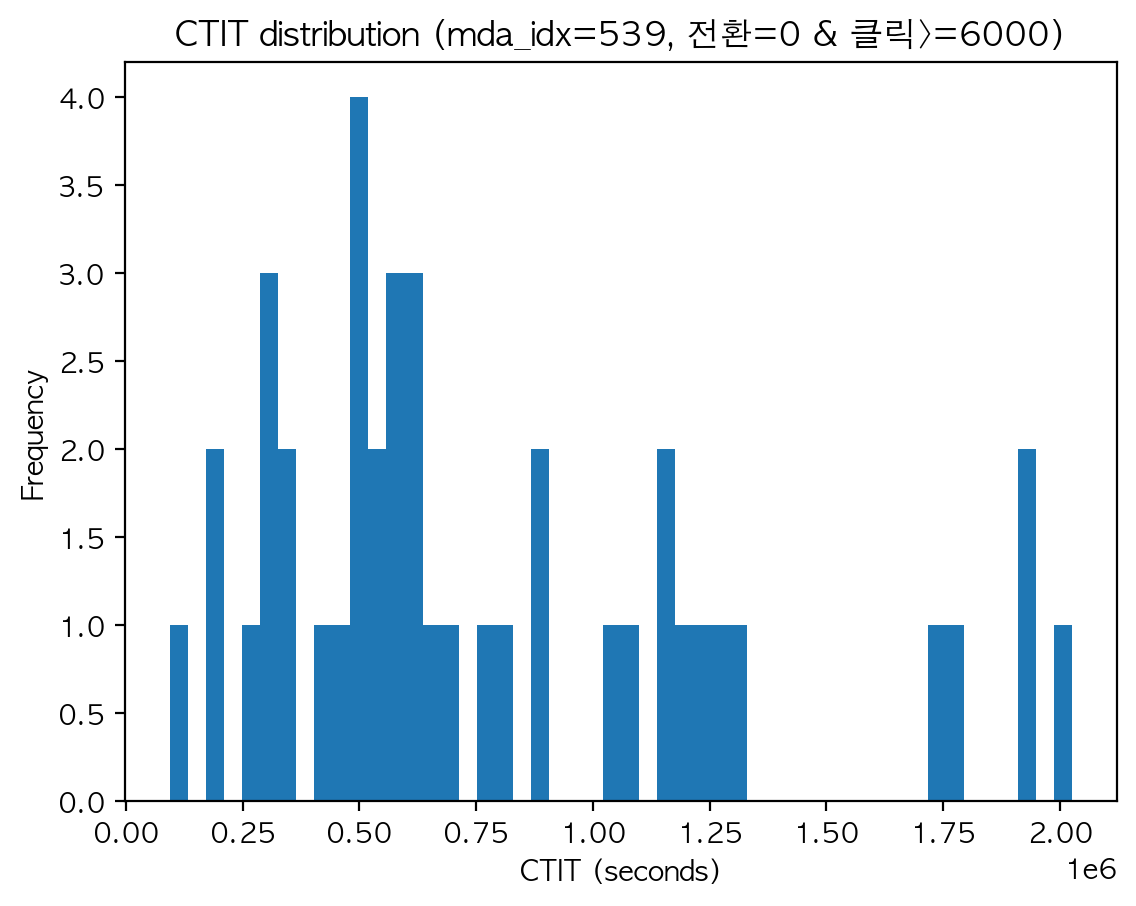

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 시간별 적립 테이블에서 조건 필터링
suspect_time = ads_time[
    (ads_time["mda_idx"] == 539) &
    (ads_time["rpt_time_turn"] == 0) &
    (ads_time["rpt_time_clk"] >= 6000)
]

print("⚠️ 조건에 해당하는 시간별 레코드 수:", suspect_time.shape[0])

# 2. 해당 광고/시간대의 ads_idx 추출
suspect_ads_idx = suspect_time["ads_idx"].unique()

# 3. 광고적립 테이블에서 해당 ads_idx의 개별 로그 추출
suspect_rwd = ads_rwd[ads_rwd["ads_idx"].isin(suspect_ads_idx)]

print("⚠️ 필터링된 광고적립 로그 수:", suspect_rwd.shape[0])

# 4. CTIT 분포 확인
if "ctit" in suspect_rwd.columns:
    ctit_desc = suspect_rwd["ctit"].describe()
    print(ctit_desc)

    # 5. CTIT 히스토그램 시각화
    plt.hist(suspect_rwd["ctit"], bins=50)
    plt.xlabel("CTIT (seconds)")
    plt.ylabel("Frequency")
    plt.title("CTIT distribution (mda_idx=539, 전환=0 & 클릭>=6000)")
    plt.show()
else:
    print("❌ ads_reward 테이블에 'ctit' 컬럼이 없습니다.")


In [187]:
ads_rwd['ctit'].describe()

count    1.475031e+06
mean     1.060344e+03
std      1.892773e+04
min      0.000000e+00
25%      4.400000e+01
50%      8.100000e+01
75%      1.430000e+02
max      2.444653e+06
Name: ctit, dtype: float64

In [188]:
# 1) IP별 고유 디바이스 수
ip_device_counts = suspect_part.groupby("user_ip")["dvc_idx"].nunique().sort_values(ascending=False)
print(ip_device_counts.head(10))

# 2) IP 대역별(앞 2옥텟) 집계
suspect_part["ip_prefix"] = suspect_part["user_ip"].str.split(".").str[:2].str.join(".")
ip_prefix_counts = suspect_part["ip_prefix"].value_counts()
print(ip_prefix_counts.head(10))


user_ip
43.203.115.240    35864
3.38.148.211      35488
16.184.28.219     35010
15.165.208.5      15278
43.203.111.66     14156
43.203.178.102    13457
16.184.11.107     12673
3.34.184.202      12630
3.38.204.160      12630
43.203.129.82     12298
Name: dvc_idx, dtype: int64


: 